In [1]:

from ocelot import *

from ocelot.gui.accelerator import *

import time

def misalign_lattice(lattice_list, sig_x, sig_y):
    for e in lattice_list:
        if e.__class__ == Quadrupole:
            e.dx  = np.random.randn() * sig_x
            e.dy  = np.random.randn() * sig_y




D1 = Drift(l=0.05)

Q1 = Quadrupole(l=1,k1=1 / (1 * 1))

D2 = Drift(l=0.2)

Q2 = Quadrupole(l=1,k1=-1/0.8)





beamline = (D1,D1,D1,D1,D1,D1,D1,D1,D1,D1,Q1,D2,D2,D2,D2,D2,D2,D2,D2,D2,D2,Q2)

lat = MagneticLattice(beamline) 

misalign_lattice(beamline, sig_x = 1.e-4, sig_y = 1.e-4)

initializing ocelot...


In [2]:
import numpy as np

# tracking
nparticles=1000
p_array=ParticleArray(n=nparticles)

x0, xp0 = 0, 0
sigx, sigxp = 1.5e-3, 0.5e-3   # convert mm/mrad to meters/radians
p_array.rparticles[0, :] = sigx * np.random.randn(nparticles) + x0
p_array.rparticles[1, :] = sigxp * np.random.randn(nparticles) + xp0

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
/Users/andreaaguirre/Library/Python/3.9/lib/python/site-packages/ocelot/cpbd/beam.py:1287: RuntimeWarning: invalid value encountered in scalar divide
  tws.beta_y = tws.yy / tws.emit_y
/Users/andreaaguirre/Library/Python/3.9/lib/python/site-packages/ocelot/cpbd/beam.py:1289: RuntimeWarning: invalid value encountered in scalar divide
  tws.alpha_y = -tws.ypy / tws.emit_y
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WA

z = 1.0 / 1. Applied: : : 

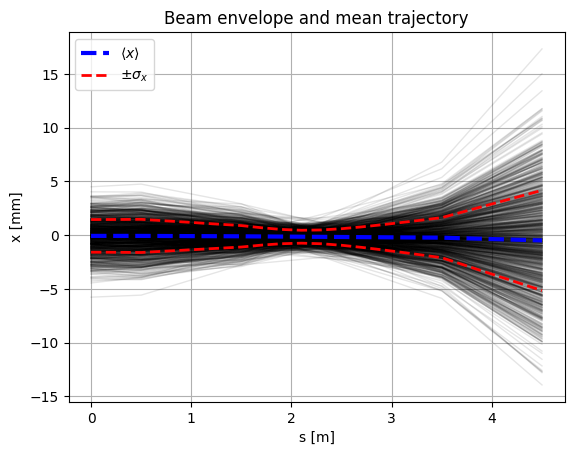

In [3]:
# --- Track step-by-step through the lattice ---
s_positions = []
x_positions = np.zeros((nparticles, len(lat.sequence)+1))
xp_positions = np.zeros((nparticles, len(lat.sequence)+1))

# initial
x_positions[:, 0] = p_array.rparticles[0, :]
xp_positions[:, 0] = p_array.rparticles[1, :]
s_positions.append(0)

p_temp = p_array.copy()

for i, elem in enumerate(lat.sequence):
    _, p_temp = track(MagneticLattice([elem]), p_temp)
    s_positions.append(s_positions[-1] + elem.l)
    x_positions[:, i+1] = p_temp.rparticles[0, :]
    xp_positions[:, i+1] = p_temp.rparticles[1, :]

s_positions = np.array(s_positions)

# --- Compute mean and std over all particles ---
mean_x = np.mean(x_positions, axis=0)
sigma_x = np.std(x_positions, axis=0)

# --- Plotting ---

# Single particle trajectories (gray)
for i in range(nparticles):
    plt.plot(s_positions, x_positions[i,:]*1e3, color='black', lw=1, alpha=0.1)

# Mean trajectory (blue)
plt.plot(s_positions, mean_x*1e3, '--', color='blue', lw=3, label=r'$\langle x \rangle$')

# 1-sigma envelope (red)
plt.plot(s_positions, (mean_x+sigma_x)*1e3, '--', color='red', lw=2, label=r'$\pm \sigma_x$')
plt.plot(s_positions, (mean_x-sigma_x)*1e3, '--', color='red', lw=2)

plt.xlabel("s [m]")
plt.ylabel("x [mm]")
plt.title("Beam envelope and mean trajectory")
plt.legend()
plt.grid(True)
plt.show()

finding trajectory...
z = 4.500000000000001 / 4.500000000000002. Applied:   

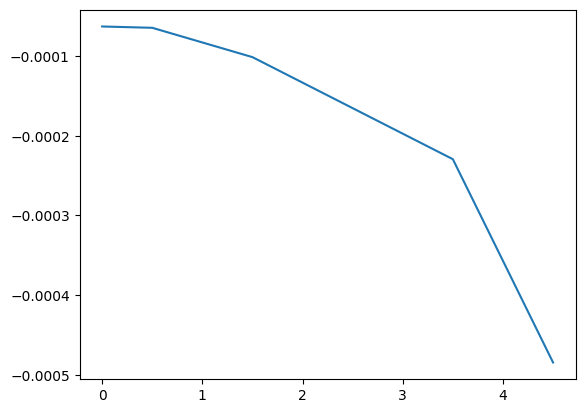

In [4]:
# Create the Navigator
navi = Navigator(lat)
navi.unit_step = 0.1  # high-resolution steps


# Track
p_no = deepcopy(p_array)
print("finding trajectory...")
start = time.time()
tws_no, p_no = track(lat, p_no, navi)

x_traj = np.array([t.x for t in tws_no])
y_traj = np.array([t.y for t in tws_no])
s_traj = np.array([t.s for t in tws_no])

plt.plot(s_traj,x_traj)

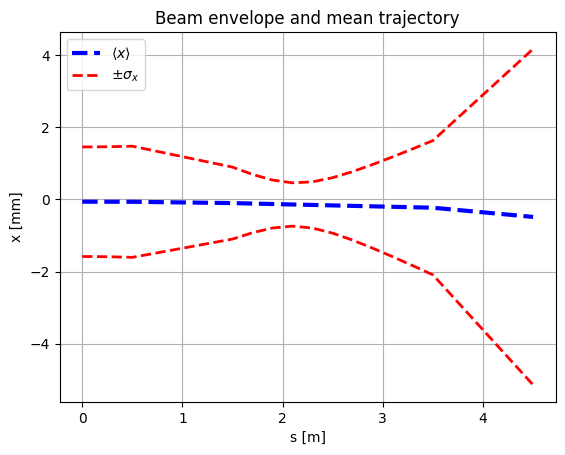

In [5]:
# Mean trajectory (blue)
plt.plot(s_positions, mean_x*1e3, '--', color='blue', lw=3, label=r'$\langle x \rangle$')

# 1-sigma envelope (red)
plt.plot(s_positions, (mean_x+sigma_x)*1e3, '--', color='red', lw=2, label=r'$\pm \sigma_x$')
plt.plot(s_positions, (mean_x-sigma_x)*1e3, '--', color='red', lw=2)

plt.xlabel("s [m]")
plt.ylabel("x [mm]")
plt.title("Beam envelope and mean trajectory")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
for elem in lat.sequence:
    if isinstance(elem, Quadrupole):
        print(f"{elem.id}: dx={elem.dx:.3e}, dy={elem.dy:.3e}")


ID_61041053_: dx=-1.384e-04, dy=3.587e-05
ID_57752959_: dx=2.605e-05, dy=1.223e-05
